# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import OpenWeatherMap API key
import os
from dotenv import load_dotenv
# Load .env enviroment variables into the notebook
load_dotenv()
# Get the API key from the environment variable and store as Python variable
weather_api_key = os.getenv("weather_api_key")

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = round(city_weather["main"]["temp_max"] - 273.15, 2)
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | antsiranana
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | tchibanga
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | cascais
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | san luis de la loma
Processing Record 15 of Set 1 | rio gallegos
Processing Record 16 of Set 1 | ola
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | sarupathar
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | badagry
Processing Record 23 o

Processing Record 38 of Set 4 | turinsk
Processing Record 39 of Set 4 | kapa'a
Processing Record 40 of Set 4 | vytegra
Processing Record 41 of Set 4 | tralee
Processing Record 42 of Set 4 | arkalyk
Processing Record 43 of Set 4 | dapchi
Processing Record 44 of Set 4 | cat ba
City not found. Skipping...
Processing Record 45 of Set 4 | dapa
Processing Record 46 of Set 4 | eyl
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | whangarei
Processing Record 49 of Set 4 | bratsk
Processing Record 0 of Set 5 | pierre
Processing Record 1 of Set 5 | ciudad dario
Processing Record 2 of Set 5 | bonthe
Processing Record 3 of Set 5 | peterhead
Processing Record 4 of Set 5 | dampit
Processing Record 5 of Set 5 | camocim
Processing Record 6 of Set 5 | butia
Processing Record 7 of Set 5 | invercargill
Processing Record 8 of Set 5 | tiksi
Processing Record 9 of Set 5 | ushuaia
Processing Record 10 of Set 5 | san jose village
City not found. Skipping...
Processing Record 11 of Set 5 

Processing Record 31 of Set 8 | callao
Processing Record 32 of Set 8 | jutai
Processing Record 33 of Set 8 | cafayate
Processing Record 34 of Set 8 | rabo de peixe
Processing Record 35 of Set 8 | byron bay
Processing Record 36 of Set 8 | mantua
Processing Record 37 of Set 8 | latehar
Processing Record 38 of Set 8 | polyarnyy
Processing Record 39 of Set 8 | san sebastian de la gomera
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | malmberget
Processing Record 42 of Set 8 | sokone
Processing Record 43 of Set 8 | parun
Processing Record 44 of Set 8 | ranot
Processing Record 45 of Set 8 | mata-utu
Processing Record 46 of Set 8 | kaliua
Processing Record 47 of Set 8 | lata
Processing Record 48 of Set 8 | akureyri
Processing Record 49 of Set 8 | celestun
Processing Record 0 of Set 9 | mir bachah kot
Processing Record 1 of Set 9 | fort st. john
Processing Record 2 of Set 9 | bathsheba
Processing Record 3 of Set 9 | lethbridge
Processing Record 4 of Set 9 | kismayo
Proce

Processing Record 24 of Set 12 | piedimonte matese
Processing Record 25 of Set 12 | nchelenge
Processing Record 26 of Set 12 | onega
Processing Record 27 of Set 12 | al bawiti
Processing Record 28 of Set 12 | lospalos
Processing Record 29 of Set 12 | gaspe
Processing Record 30 of Set 12 | sola
Processing Record 31 of Set 12 | new plymouth
Processing Record 32 of Set 12 | mo i rana
Processing Record 33 of Set 12 | tadine
Processing Record 34 of Set 12 | aykhal
Processing Record 35 of Set 12 | grand island
Processing Record 36 of Set 12 | isangel
Processing Record 37 of Set 12 | greymouth
Processing Record 38 of Set 12 | monte argentario
Processing Record 39 of Set 12 | antsirabe afovoany
City not found. Skipping...
Processing Record 40 of Set 12 | madzhalis
Processing Record 41 of Set 12 | nelson bay
Processing Record 42 of Set 12 | schwelm
Processing Record 43 of Set 12 | vilyuysk
Processing Record 44 of Set 12 | fonte boa
Processing Record 45 of Set 12 | novoul'yanovsk
Processing Reco

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,1.90,83,52,2.68,CA,1712862486
1,albany,42.6001,-73.9662,14.21,80,100,1.79,US,1712862002
2,uturoa,-16.7333,-151.4333,28.56,79,19,7.43,PF,1712862384
3,bethel,41.3712,-73.4140,15.20,87,100,1.54,US,1712862101
4,antsiranana,-12.2787,49.2917,25.61,91,7,1.57,MG,1712862480


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,1.90,83,52,2.68,CA,1712862486
1,albany,42.6001,-73.9662,14.21,80,100,1.79,US,1712862002
2,uturoa,-16.7333,-151.4333,28.56,79,19,7.43,PF,1712862384
3,bethel,41.3712,-73.4140,15.20,87,100,1.54,US,1712862101
4,antsiranana,-12.2787,49.2917,25.61,91,7,1.57,MG,1712862480


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

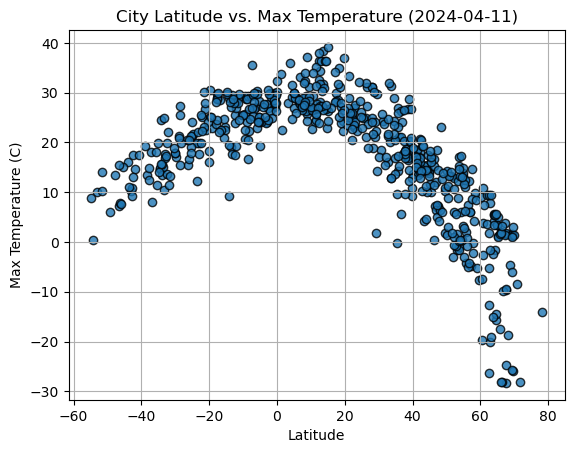

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

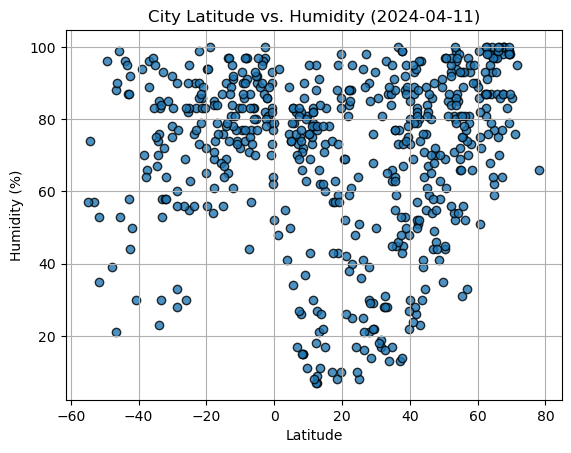

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

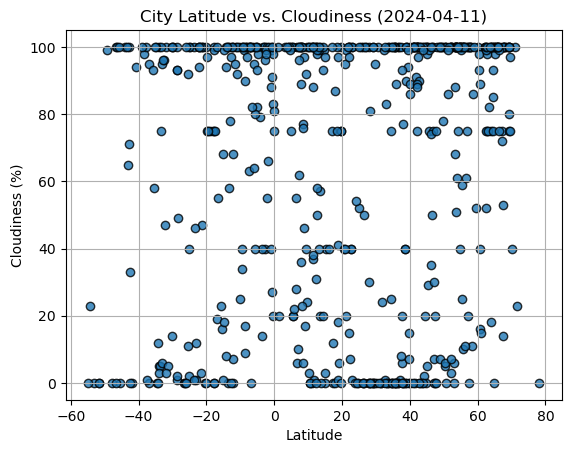

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

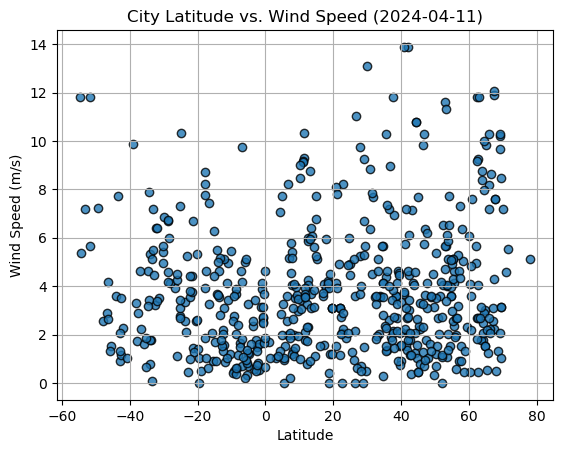

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor='black', alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.fromtimestamp(city_data_df['Date'][0]).strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plot
def lin_regress_plot(x, y, x_label, y_label, line_x_cord, line_y_coord):
    ''' Function takes in two columns or series of data and performs a linear regression calculation.
    
    Args:
        x: DataFrame column for plotting along the x-axis,
        y: DataFrame column for plotting along the y-axis,
        x_label: scatter plot x label,
        y_label: scatter plot y label,
        line_x_cord: x coordinate for regression line equation placement,
        line_y_coord: y coordinate for regression line equation placement.
    
    Returns:
        - A scatter plot using the data from the two columns.
        - A regression line plot showing the linear relationship between two sets of data.
        - The line equation for the linear regression.
    
    '''
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_y = x * slope + intercept
    print(f'The r-value is: {rvalue}')
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_y,"r", alpha=0.5)
    plt.annotate(line_equation,(line_x_cord,line_y_coord),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,1.90,83,52,2.68,CA,1712862486
1,albany,42.6001,-73.9662,14.21,80,100,1.79,US,1712862002
3,bethel,41.3712,-73.4140,15.20,87,100,1.54,US,1712862101
5,bilibino,68.0546,166.4372,-18.64,99,100,0.49,RU,1712862373
8,nova sintra,14.8667,-24.7167,22.84,73,3,6.76,CV,1712862489


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,uturoa,-16.7333,-151.4333,28.56,79,19,7.43,PF,1712862384
4,antsiranana,-12.2787,49.2917,25.61,91,7,1.57,MG,1712862480
6,grytviken,-54.2811,-36.5092,0.42,74,23,5.36,GS,1712862374
7,blackmans bay,-43.0167,147.3167,10.29,87,65,0.89,AU,1712862373
9,tchibanga,-2.8500,11.0333,24.16,97,100,1.78,GA,1712862490


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8560892789308685


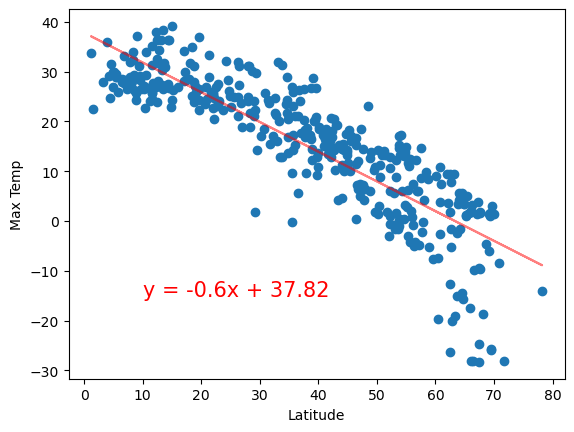

In [16]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp", 10, -15)

The r-value is: 0.8067212254652627


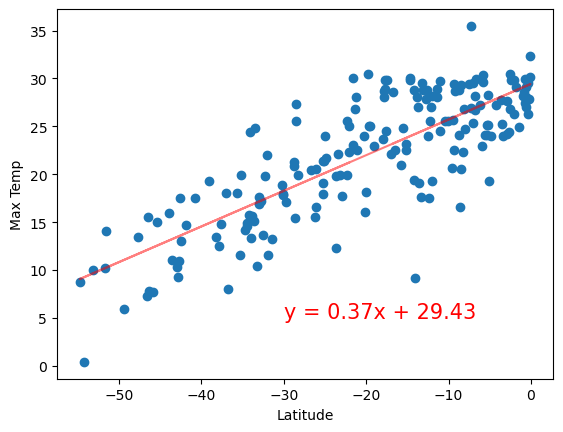

In [17]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -30, 5)

**Discussion about the linear relationship:** The Northern Hemisphere appears to have a much stronger correlation of Max Temp vs. Latitude (with an r-value of 0.90) compared to the Southern Hempisphere (with an r-value of 0.68). The relationship between Max Temp and Latitude in the Southern Hemisphere scatter appears to be much more variable. This variability in the Southern Hemisphere is likely related to the Southern Hemisphere having more turbulent atmospheric activity due to greater surface areas of ocean (61% in the NH vs 81% in the SH) and therefore a lower proportion of land mass (temperatures are generally more stable over land), which would impact the variability of temeratures. As expected, however, both Hemispheres show an increase in Max Temp towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.37251657126994914


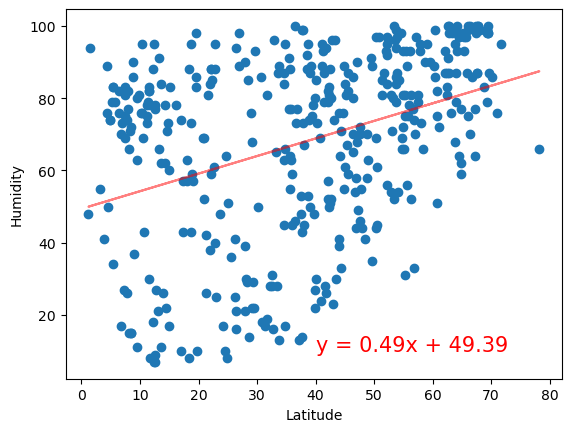

In [18]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 40, 10)

The r-value is: 0.3062501084693864


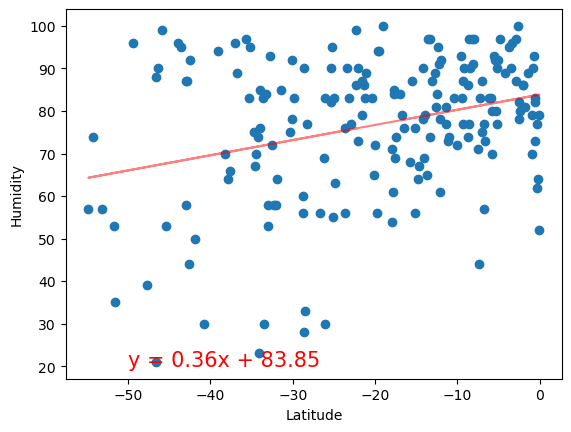

In [19]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -50, 20)

**Discussion about the linear relationship:**  In both Hemispheres, the regression line plot shows a very gradual increase in Humidity as you go further north. However, both Northern and Southern Hemispheres have low to no correlation values for Humiduty vs Latitude. Due to the weak linear relationship it is not possible to conlude anything of value, except perhaps for the possibility of greater variability of humidty as you get closer to the South pole.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17037032580720052


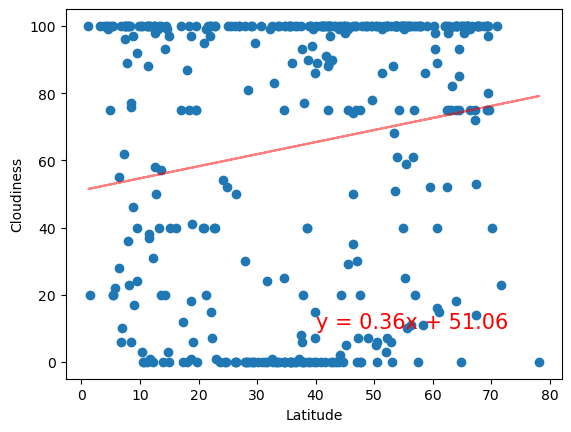

In [20]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 40, 10)

The r-value is: 0.26751477861638695


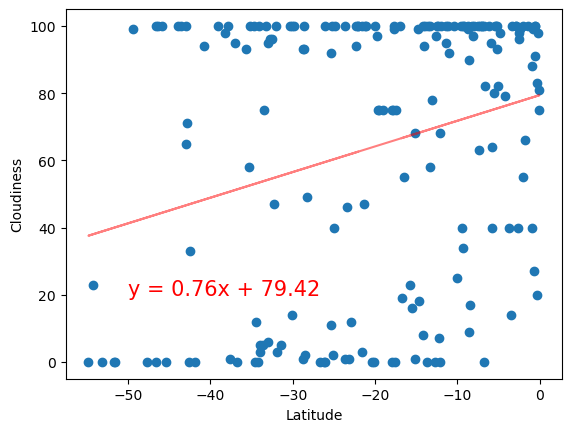

In [21]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -50, 20)

**Discussion about the linear relationship:** Similar to Humidity, both Hemispheres also appear to increase in cloudiness as you go further north when looking at the regression line. However, both Hemispheres have low to no correlation values when looking at Cloudiness vs Latitude. Again the data is too variable to conclude anything with condifence from this observation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11443513027488797


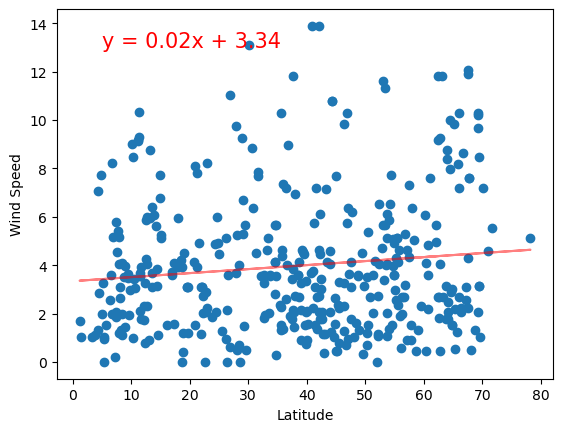

In [22]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 5, 13)

The r-value is: -0.344265159050627


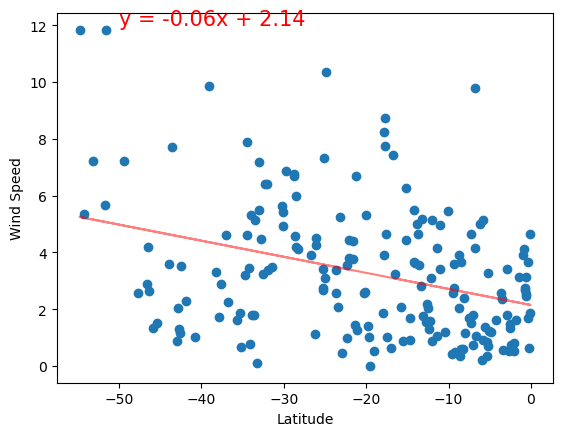

In [23]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 12)

**Discussion about the linear relationship:** Looking at the regression line plot, we can see a very slight increase with wind speed as you get closer towards each pole. However, like Humidity and Cloudiness, Wind Speed vs Latitude shows low to no correlation. One possible insight is that there is a slightly greater variability in windspeed as you get closer to the South pole.